In [1]:
%load ImportsDefinitions.py

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexi

True

In [2]:
#φορτώνουμε τα σετ δεδομένων
path1='design_matrix.csv'
path2='mean_emotion_ratings.csv'
data_input= pd.read_csv(path1)
data_class= pd.read_csv(path2)


In [3]:
data_input.head(5)

,Nro,Register,Mode,Tempo,Soundlevel,Articulation,Timbre,Melody
0,1,4,1,4,4,2,2,4
1,2,5,1,4,1,1,2,2
2,3,2,2,5,1,1,2,1
3,4,1,1,5,4,4,1,2
4,5,3,2,1,3,2,2,1


In [4]:
data_class.head(5)

,Nro,Scary,Happy,Sad,Peaceful
0,1,1.2889,4.4667,1.7111,3.1333
1,2,1.0667,5.4444,1.4889,4.4889
2,3,2.0222,1.4889,3.7778,2.7111
3,4,2.2889,4.1111,1.2667,1.4889
4,5,1.4000,1.4667,5.0444,3.8444


In [5]:
#data examination

count=0
for i in range (0,len(data_class)):
    if ((data_class['Happy'][i]>data_class['Sad'][i]) and (data_class['Peaceful'][i]<data_class['Scary'][i])):
        count=count+1
print("Έχουμε " + str(count) + " περιπτώσεις όπου happy>sad και peaceful < scary")#Παρατηρούμε ότι στο dataset εχουμε περιπτωσεις οπου η κλαση happy kai peaceful den symvadizoun san dyadika antitheta panta.
print("Συνεπώς υπάρχει αμφισημία μεταξύ των κλάσεων από το dataset μας.")
#synepws tha ftiaksoume 3 diaforetika classiciation gia ta dedomena pou exoume
print("Θα δημιουργήσουμε 3 διαφορετικές περιπτώσεις με βάση τις υπάρχουσες κλάσεις, ώστε να καλύψουμε τις διαφορετικές εκδοχές")

Έχουμε 22 περιπτώσεις όπου happy>sad και peaceful < scary
Συνεπώς υπάρχει αμφισημία μεταξύ των κλάσεων από το dataset μας.
Θα δημιουργήσουμε 3 διαφορετικές περιπτώσεις με βάση τις υπάρχουσες κλάσεις, ώστε να καλύψουμε τις διαφορετικές εκδοχές


Η απλή κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: 
Έχουμε 86 χαρούμενα τραγούδια
Έχουμε 114 στενάχωρα τραγούδια


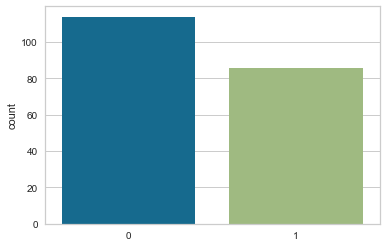

In [6]:

#θα δημιουργήσουμε διαφορετικές κλάσεις ώστε να καλύψουμε όλο το φάσμα των περιπτώσεων, δημιουργώντας 3 περιπτώσεις:
#Μία πιο απλή, (happy vs sad)
#μια πιο εξειδικευμένη (happy+peaceful vs peaceful+scary)
#και η πιο εξειδικευμένη θα ακολουθεί την εξής λογική
#αν happy>sad και peaceful >scary ->happy
#aν sad>happy και scary>peaceful -> sad
#αν happy>sad scary>peaceful τότε αν |happy - sad | *150%> |scary - peaceful| *50%-> happy, else sad

#τροποποιούμε το dataset των κλάσεων έτσι ώστε να έχουμε 2 κλάσεις, 1 για χαρούμενο 
#και 0 για στενάχωρο τραγούδι, αντίθετα με τις 4 κλάσεις που έχουμε ήδη φτιάξει
music_class_simple=[]

for i in range (0,len(data_class)):
    if (data_class['Happy'][i]>data_class['Sad'])[i]:
        music_class_simple.append(1)
    else:
        music_class_simple.append(0)
print("Η απλή κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: ")
#print(music_class_simple)
#τώρα στο music_class_simple εχουμε τις κλάσεις των συναισθημάτων μας

print("Έχουμε " + str(music_class_simple.count(1)) + " χαρούμενα τραγούδια")
print("Έχουμε " + str(music_class_simple.count(0)) + " στενάχωρα τραγούδια")
sns.countplot(music_class_simple,label="Count")
plt.show()


Η δεύτερη κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: 
Έχουμε 92 χαρούμενα τραγούδια
Έχουμε 108 στενάχωρα τραγούδια


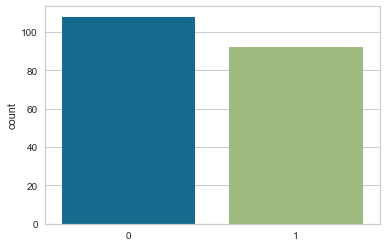

In [7]:
music_class_better=[]
#print(data_class)
for i in range (0,len(data_class)):
    if ((data_class['Happy'][i] + data_class['Peaceful'][i]) > (data_class['Sad'] + data_class['Scary'][i])[i]):
        music_class_better.append(1)
    else:
        music_class_better.append(0)
print("Η δεύτερη κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: ")
#print(music_class_better)

print("Έχουμε " + str(music_class_better.count(1)) + " χαρούμενα τραγούδια")
print("Έχουμε " + str(music_class_better.count(0)) + " στενάχωρα τραγούδια")
sns.countplot(music_class_better,label="Count")
plt.show()


Η κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: 
Έχουμε 102 χαρούμενα τραγούδια
Έχουμε 98 στενάχωρα τραγούδια


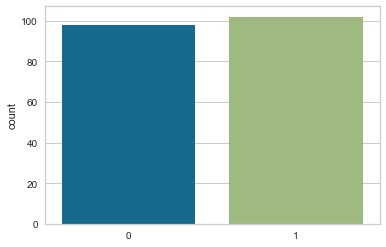

In [8]:
music_class_best=[]
for i in range (0,len(data_class)):
    if (((data_class['Happy'][i]) >= (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) >= (data_class['Scary'][i]))):
            music_class_best.append(1)
    elif (((data_class['Happy'][i]) < (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) < (data_class['Scary'][i]))):
            music_class_best.append(0)
    elif (((data_class['Happy'][i]) >= (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) < (data_class['Scary'][i]))):
        if (1,5*((data_class['Happy'][i]) - (data_class['Sad'][i])) >= (0.5*(data_class['Scary'][i]) - (data_class['Peaceful'][i]))):
            music_class_best.append(1)
        elif (1,5*(data_class['Happy'][i]) - (data_class['Sad'][i]) < 0.5*((data_class['Scary'][i]) - (data_class['Peaceful'][i]))):
            music_class_best.append(0)
    elif (((data_class['Happy'][i]) < (data_class['Sad'][i])) and ((data_class['Peaceful'][i]) >= (data_class['Scary'][i]))):
        if ((data_class['Sad'][i]) - (data_class['Happy'][i]) >= ((data_class['Peaceful'][i]) - (data_class['Scary'][i]))):
            music_class_best.append(0)
        elif ((data_class['Sad'][i]) - (data_class['Happy'][i]) < ((data_class['Peaceful'][i]) - (data_class['Scary'][i]))):
            music_class_best.append(1)


print("Η κλάση συναισθήματος που φτιάξαμε περιλαμβάνει: ")
#print(music_class_best)
print("Έχουμε " + str(music_class_best.count(1)) + " χαρούμενα τραγούδια")
print("Έχουμε " + str(music_class_best.count(0)) + " στενάχωρα τραγούδια")
sns.countplot(music_class_best,label="Count")
plt.show()

In [11]:
#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(data_input, music_class_simple, test_size=0.2,random_state=1)
#Για την πρώτη κλάση, δοκιμάζουμε διαφορετικούς classifiers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_input)

X_scaled = scaler.fit_transform(data_input)
#X_test_simple_scaled = scaler.transform(X_test_s)
#print(X_scaled)

classifier_finder_music(X_scaled,music_class_simple)


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

Τα αποτελέσματα του Cross-Validation για τον LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8792481203007518 
Τα αποτελέσματα του Cross-Validation για τον DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.8654636591478697 
Τα αποτελέσματα του Cross-Validation για τον RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impuri

In [63]:
classifier_finder_music(X_scaled,music_class_better)


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Τα αποτελέσματα του Cross-Validation για τον LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8448496240601504 
Τα αποτελέσματα του Cross-Validation για τον DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.8353508771929825 
Τα αποτελέσματα του Cross-Validation για τον RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impuri

In [89]:

classifier_finder_music(X_scaled,music_class_best)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Τα αποτελέσματα του Cross-Validation για τον LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.871140350877193 
Τα αποτελέσματα του Cross-Validation για τον DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.7822055137844611 
Τα αποτελέσματα του Cross-Validation για τον RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurit

In [ ]:
#θελουμε να κανουμε optimize : 

#Linear SVC, k-nn,LSVC

In [106]:
#Gridsearch πρώτης περίπτωσης
from sklearn.model_selection import GridSearchCV
import time

max_iter=[110,200,500,1000]
C = [0.1,0.5,1.0,1.5,2.0,2.5,5,10]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lSVC=LinearSVC()
grid = GridSearchCV(estimator=lSVC, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_scaled, music_class_simple)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
best_clf1=LinearSVC(**grid_result.best_params_)
best_clf1.fit(X_scaled,music_class_simple)


Best: 0.900000 using {'C': 5, 'dual': True, 'max_iter': 200}
Execution time: 0.7829039096832275 ms


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=200,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [105]:
#grid gia knn
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()
start_time = time.time()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_scaled,music_class_better)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
best_clf2 = KNeighborsClassifier(**grid.best_params_)
best_clf2.fit(X_scaled,music_class_better)

Best: 0.860000 using {'n_neighbors': 18, 'weights': 'distance'}
Execution time: 2.605076313018799 ms


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='distance')

In [130]:
import numpy as np
print(np.logspace(-2,2,5))

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [107]:
#Gridsearch τρίτης περίπτωσης
from sklearn.model_selection import GridSearchCV
import time

max_iter=[110,200,500,1000,1500,2000]
C = [0.1,0.5,1.0,1.5,2.0,2.5,5,10]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lSVC=LinearSVC()
grid = GridSearchCV(estimator=lSVC, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_scaled, music_class_best)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
best_clf3 = LinearSVC(**grid_result.best_params_)
best_clf3.fit(X_scaled,music_class_better)

Best: 0.870000 using {'C': 0.5, 'dual': True, 'max_iter': 110}
Execution time: 1.4431042671203613 ms


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=110,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [126]:
#ελέγχουμε τους classifiers μας. Επειδή έχουμε εκπαιδεύσει και τους 3 στο ίδιο training data με διαφορετικά labels,
#θα δημιουργήσουμε 3 ελέγχους ,με 3 σκορ τα οποία θα πολλαπλασιάσουμε μεταξύ τους για να βρούμε το καλύτερο
#παίρνουμε σαν σωστή κλάση την 1η
X_train, X_test, y_train, y_true = train_test_split(X_scaled, music_class_simple, test_size=0.25, random_state=42) 
# make a prediction
ypred1 = best_clf1.predict(X_test)
ypred2 = best_clf2.predict(X_test)
ypred3 = best_clf3.predict(X_test)
print("Για την απλή κλάση συναισθημάτων:")
print("Η επιτυχία του πρώτου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred1)))
print("Η επιτυχία του δεύτερου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred2)))
print("Η επιτυχία του τρίτου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred3)))
print()
#ελέγχουμε τους classifiers μας. Επειδή έχουμε εκπαιδεύσει και τους 3 στο ίδιο training data με διαφορετικά labels,
#θα δημιουργήσουμε 3 ελέγχους ,με 3 σκορ τα οποία θα πολλαπλασιάσουμε μεταξύ τους για να βρούμε το καλύτερο
#παίρνουμε σαν σωστή κλάση την 2η
X_train, X_test, y_train, y_true = train_test_split(X_scaled, music_class_better, test_size=0.25, random_state=42) 
# make a prediction
ypred1 = best_clf1.predict(X_test)
ypred2 = best_clf2.predict(X_test)
ypred3 = best_clf3.predict(X_test)
print("Για την δεύτερη κλάση συναισθημάτων:")
print("Η επιτυχία του πρώτου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred1)))
print("Η επιτυχία του δεύτερου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred2)))
print("Η επιτυχία του τρίτου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred3)))
print()

#ελέγχουμε τους classifiers μας. Επειδή έχουμε εκπαιδεύσει και τους 3 στο ίδιο training data με διαφορετικά labels,
#θα δημιουργήσουμε 3 ελέγχους ,με 3 σκορ τα οποία θα πολλαπλασιάσουμε μεταξύ τους για να βρούμε το καλύτερο
#παίρνουμε σαν σωστή κλάση την 3η
X_train, X_test, y_train, y_true = train_test_split(X_scaled, music_class_best, test_size=0.25, random_state=42) 
# make a prediction
ypred1 = best_clf1.predict(X_test)
ypred2 = best_clf2.predict(X_test)
ypred3 = best_clf3.predict(X_test)
print("Για την τρίτη κλάση συναισθημάτων:")
print("Η επιτυχία του πρώτου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred1)))

print("Η επιτυχία του δεύτερου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred2)))
print("Η επιτυχία του τρίτου ταξινομητή είναι {}".format(accuracy_score(y_true, ypred3)))

Για την απλή κλάση συναισθημάτων:
Η επιτυχία του πρώτου ταξινομητή είναι 0.9
Η επιτυχία του δεύτερου ταξινομητή είναι 0.92
Η επιτυχία του τρίτου ταξινομητή είναι 0.88

Για την δεύτερη κλάση συναισθημάτων:
Η επιτυχία του πρώτου ταξινομητή είναι 0.86
Η επιτυχία του δεύτερου ταξινομητή είναι 1.0
Η επιτυχία του τρίτου ταξινομητή είναι 0.88

Για την τρίτη κλάση συναισθημάτων:
Η επιτυχία του πρώτου ταξινομητή είναι 0.86
Η επιτυχία του δεύτερου ταξινομητή είναι 0.96
Η επιτυχία του τρίτου ταξινομητή είναι 0.88
